## Continuous system での Lyapunov exponentsの計算


以下のノートは https://gist.github.com/tkf/014787f386e99b7b8b42683cfbd8da01 を参考にして作成した

### Lyapunov exponentsの定義

以下の非線形力学系を考える

\begin{align}
  \frac{d {\bf x}(t)}{d t}=f({\bf x(t}, t)
\end{align}

微小変異$\delta {\bf x}(t)$(tangent space)の発展方程式は、上の$f({\bf x(t}, t)$を線形化したヤコビ行列$\mathbf{J}({\bf x}(t))$で書ける

\begin{align}
  \frac{d \delta {\bf x}(t)}{d t}=\mathbf{J}({\bf x}(t)) \delta {\bf x}(t)
\end{align}

Lyapunov exponentsとは、この微小変異空間における体積変化率の平均である。
体積素片を構成するベクトルからなる行列を${\bf P}({\bf x})={{\bf p}_1, \ldots, {\bf p}_K}$とすると、${\bf P}({\bf x})$の発展方程式は上に従う。

系がergodicであるとして、無限大の体積変化率の時間平均でLyapunov exponentsを定義する。

\begin{align}
  \lambda_k = \lim_{T \rightarrow \infty} \frac{1}{2T} \ln \left[ {\bf P}^T(T) {\bf P}(T) \right]_k
\end{align}

ここで $\left[\cdot\right]_k$は$k$番目の固有値である。



In [1]:
using DifferentialEquations
using ForwardDiff
using LinearAlgebra
using Plots

┌ Info: Recompiling stale cache file /Users/yasu/.julia/compiled/v1.1/DifferentialEquations/UQdwS.ji for DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1184


In [5]:
# 問題の定義

function lorenz!(du, u, p, t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8.0/3.0)*u[3]
 du   
end

function lorenz_jacobian!(J, u)
    J[1, 1] = -10.0
    J[1, 2] = 10.0
    J[1, 3] = 0.0
    J[2, 1] = 28.0-u[3]
    J[2, 2] = -1.0
    J[2, 3] = -u[1]
    J[3, 1] = u[2]
    J[3, 2] = u[1]
    J[3, 3] = -(8.0/3.0)
    J
end

lorenz_jacobian! (generic function with 1 method)

In [3]:
function lorenz(u)
 du = zeros(Float64, 3)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8.0/3.0)*u[3]
 du
end

function lorenz_jacobian(u)
    J = zeros(Float64, (3, 3))
    J[1, 1] = -10.0
    J[1, 2] = 10.0
    J[1, 3] = 0.0
    J[2, 1] = 28.0-u[3]
    J[2, 2] = -1.0
    J[2, 3] = -u[1]
    J[3, 1] = u[2]
    J[3, 2] = u[1]
    J[3, 3] = -(8.0/3.0)
    J
end

lorenz_jacobian (generic function with 1 method)

In [6]:
u0 = [0.9; 0.9; 0.0]
tspan = (0.0,100.0)

prob = ODEProblem(lorenz!, u0, tspan)
sol = solve(prob, saveat=0.01, abstol=1e-10, reltol=1e-10)

retcode: Success
Interpolation: 1st order linear
t: 10001-element Array{Float64,1}:
   0.0 
   0.01
   0.02
   0.03
   0.04
   0.05
   0.06
   0.07
   0.08
   0.09
   0.1 
   0.11
   0.12
   ⋮   
  99.89
  99.9 
  99.91
  99.92
  99.93
  99.94
  99.95
  99.96
  99.97
  99.98
  99.99
 100.0 
u: 10001-element Array{Array{Float64,1},1}:
 [0.9, 0.9, 0.0]                
 [0.911741, 1.14285, 0.00911796]
 [0.945615, 1.38959, 0.0204672] 
 [1.00017, 1.6461, 0.034484]    
 [1.07465, 1.91786, 0.0518003]  
 [1.16885, 2.21017, 0.0732635]  
 [1.2831, 2.52824, 0.0999737]   
 [1.41821, 2.87736, 0.133338]   
 [1.57541, 3.26297, 0.175144]   
 [1.75634, 3.69076, 0.227651]   
 [1.96304, 4.16677, 0.29371]    
 [2.19797, 4.6974, 0.376916]    
 [2.46394, 5.28946, 0.481784]   
 ⋮                              
 [11.5363, 13.9107, 28.0313]    
 [11.7537, 13.7189, 28.8825]    
 [11.9275, 13.4291, 29.7099]    
 [12.0525, 13.0439, 30.4956]    
 [12.1246, 12.5693, 31.2221]    
 [12.1407, 12.0149, 31.8733]    
 [12

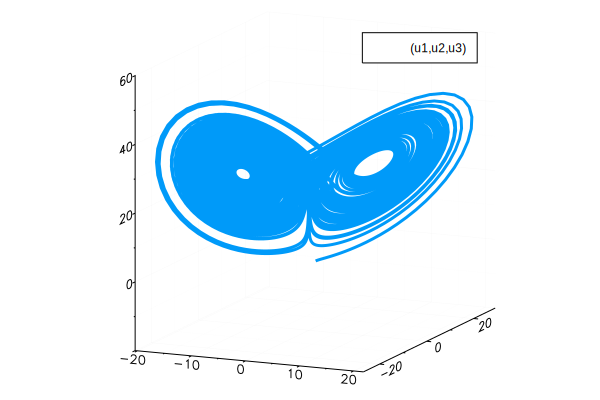

In [7]:
plot(sol,vars=(1,2,3))

In [10]:
sol[1]

3-element Array{Float64,1}:
 0.9
 0.9
 0.0

In [11]:
lorenz_jacobian(sol[1])

3×3 Array{Float64,2}:
 -10.0  10.0   0.0    
  28.0  -1.0  -0.9    
   0.9   0.9  -2.66667

In [12]:
?ForwardDiff.jacobian


```
ForwardDiff.jacobian(f, x::AbstractArray, cfg::JacobianConfig = JacobianConfig(f, x), check=Val{true}())
```

Return `J(f)` evaluated at `x`, assuming `f` is called as `f(x)`.

This method assumes that `isa(f(x), AbstractArray)`.

Set `check` to `Val{false}()` to disable tag checking. This can lead to perturbation confusion, so should be used with care.

---

```
ForwardDiff.jacobian(f!, y::AbstractArray, x::AbstractArray, cfg::JacobianConfig = JacobianConfig(f!, y, x), check=Val{true}())
```

Return `J(f!)` evaluated at `x`,  assuming `f!` is called as `f!(y, x)` where the result is stored in `y`.

Set `check` to `Val{false}()` to disable tag checking. This can lead to perturbation confusion, so should be used with care.


In [20]:
y = zeros(Float64, 3)
ForwardDiff.jacobian(lorenz!, y, [0.9, 0.9, 0.0])
#lorenz([0.9, 0.9, 0.0])

3-element Array{Float64,1}:
  0.0 
 24.3 
  0.81

In [44]:
P = [1 2 3; 4 5 6; 7 8 9]

3×3 Array{Int64,2}:
 1  2  3
 4  5  6
 7  8  9

In [45]:
p1 = (@view P[:, 1])

3-element view(::Array{Int64,2}, :, 1) with eltype Int64:
 1
 4
 7

In [46]:
p1[2] = 100

100

In [47]:
P

3×3 Array{Int64,2}:
   1  2  3
 100  5  6
   7  8  9

In [17]:
function tangent_dynamics!(du, u, p, t)
    lorenz!((@view du[:, 1]), u[:, 1])
    J = lorenz_jacobian(u[:, 1])
    mul!((@view du[:, 2:end]), J, u[:, 2:end])
    du
end

tangent_dynamics! (generic function with 2 methods)

In [22]:
u0 = [0.9 1.0 0.0 0.0; 0.9 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
du = zeros(Float64, (3, 4))
tangent_dynamics!(du, u0)
u0

3×4 Array{Float64,2}:
 0.9  1.0  0.0  0.0
 0.9  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

In [23]:
u0 = [0.9 1.0 0.0 0.0; 0.9 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
tspan = (0.0,100.0)

prob = ODEProblem(tangent_dynamics!, u0, tspan)
sol = solve(prob, saveat=0.01, abstol=1e-10, reltol=1e-10)

retcode: Success
Interpolation: 1st order linear
t: 10001-element Array{Float64,1}:
   0.0 
   0.01
   0.02
   0.03
   0.04
   0.05
   0.06
   0.07
   0.08
   0.09
   0.1 
   0.11
   0.12
   ⋮   
  99.89
  99.9 
  99.91
  99.92
  99.93
  99.94
  99.95
  99.96
  99.97
  99.98
  99.99
 100.0 
u: 10001-element Array{Array{Float64,2},1}:
 [0.9 1.0 0.0 0.0; 0.9 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]                                                                                    
 [0.911741 0.917922 0.0951214 -0.000431995; 1.14285 0.266256 1.00349 -0.00891566; 0.00911796 0.0108372 0.00942464 0.973644]             
 [0.945615 0.867898 0.182763 -0.00167421; 1.38959 0.511387 1.03222 -0.0179623; 0.0204672 0.0252476 0.0202326 0.947888]                  
 [1.00017 0.845284 0.265936 -0.00368217; 1.6461 0.743791 1.08422 -0.0275489; 0.034484 0.0434097 0.033212 0.922687]                      
 [1.07465 0.846617 0.347219 -0.0064526; 1.91786 0.970632 1.15833 -0.0380475; 0.0518003 0.0658866 0.0491986 0.897983]

In [24]:
twindow = 1.0
niterate = 1000
y = zeros(Float64, 3)
r = zeros(Float64, 3)
lyapunov_exponent = zeros(niterate, 3)

u0 = [0.9 1.0 0.0 0.0; 0.9 0.0 1.0 0.0; 0.0 0.0 0.0 1.0]
prob = ODEProblem(tangent_dynamics!, u0, (0, 100))
u0 = sol[end]
u0[:, 2:end] = [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0];

tspan = (0.0, twindow)

for iiterate in 1:niterate
    prob = ODEProblem(tangent_dynamics!, u0, tspan)
    sol = solve(prob, save_everystep=false, abstol=1e-10, reltol=1e-10)
    P = sol[end][:, 2:end]
    
    F = qr(P)
    signR = diag(F.R) .< 0.0
    Q = Matrix(F.Q)
    R = Matrix(F.R)
    for j in 1:3
        if signR[j]
            Q[:, j] .= Q[:, j] .* -1.0
            R[j, :] .= R[j, :] .* -1.0
        end
    end
    
    #println(log.(diag(R)))
    #r = r .+ log.(abs.(diag(F.R)))
    r = r .+ log.(diag(R))
    lyapunov_exponent[iiterate, :] .= r ./ (twindow*iiterate)
    
    u0 = sol[end]
    #u0[:, 2:end] = [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0];
    u0[:, 2:end] = Q;
    #println(u0)
end

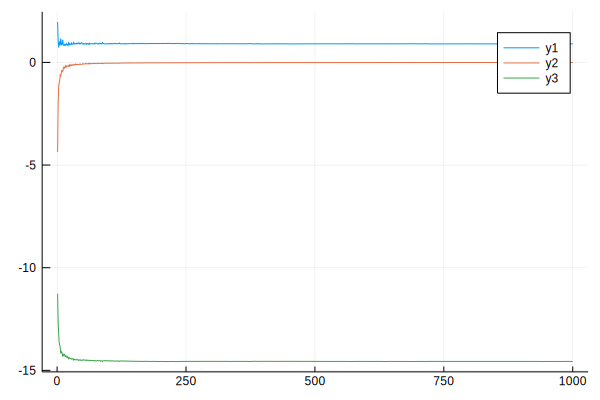

In [25]:
plot(lyapunov_exponent)

In [26]:
lyapunov_exponent[end, :]

3-element Array{Float64,1}:
   0.9043640869735782   
  -0.0035055878742946923
 -14.567525162698082    